In [1]:
import pandas as pd

df = pd.read_csv('../data/student/student-mat.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [2]:
X = df.filter(items=['studytime', 'age', 'absences', 'freetime', 'traveltime', 'failures', 'Medu', 'Fedu', 'famrel', 'goout', 'Dalc', 'Walc', 'health']).to_numpy()
Y = df.filter(items=['G3']).to_numpy()

In [3]:
X.shape, Y.shape

((395, 13), (395, 1))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((316, 13), (79, 13), (316, 1), (79, 1))

In [73]:
from neural_network import NeuralNetwork
from loss.mse import MSE
from layer import Layer
from activation.tanh import Tanh
from activation.relu import ReLU


nn = NeuralNetwork(MSE)
nn.add(Layer(13, 7))
nn.add(Tanh())
nn.add(Layer(7, 4))
nn.add(ReLU())
nn.add(Layer(4, 1))


print(nn)
losses = nn.train(X_train, Y_train, epochs=2000, learning_rate=0.001)
print(nn)

-----
Layer (13, 7)
Weights
[[ 0.0508124   0.04884736 -0.04750474 -0.0210513   0.02314904  0.23422411
   0.04728226]
 [ 0.04383923  0.05125617 -0.1337636  -0.0163319   0.11132498 -0.02463096
   0.07048379]
 [ 0.03329869  0.12827915 -0.00236591 -0.06536051  0.03020694  0.03797512
  -0.02762016]
 [-0.04282361  0.01481816 -0.03083931 -0.07890337  0.01409024 -0.18916355
   0.1020466 ]
 [-0.12935482 -0.01294494  0.06169125  0.07302504 -0.0490611   0.01569796
   0.07793925]
 [ 0.02065321  0.07263516 -0.00964962 -0.12748296 -0.04592184 -0.05330427
   0.00045925]
 [ 0.10641522 -0.15997801  0.03193428  0.00355787  0.10964255  0.0351121
   0.06015017]
 [ 0.0541356  -0.04244721 -0.06272908 -0.00164847 -0.00056852  0.00842366
  -0.05047662]
 [-0.00251614  0.04867764 -0.07423429  0.10835694  0.03949171  0.00525172
  -0.03709794]
 [-0.03236813  0.04863979  0.05061786  0.00390768  0.08556237 -0.10704681
   0.02257862]
 [ 0.00235254 -0.08974013  0.11203976 -0.09667674  0.02533431 -0.03355439
  -0.0936

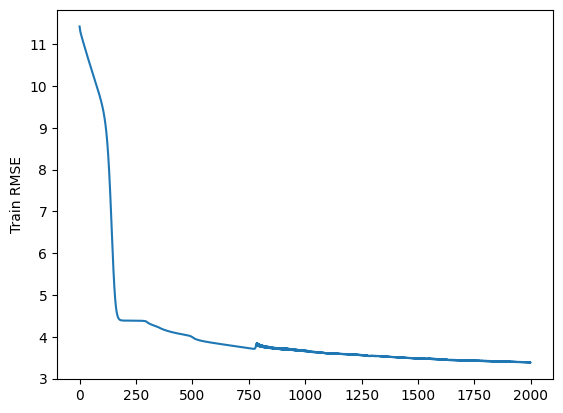

train: 2.6472003072073367 3.3927613509664534
test: 3.7446523738085733 4.8875317154078735


In [74]:
import matplotlib.pyplot as plt
import numpy as np
from loss.mae import MAE

plt.ylabel('Train RMSE')
plt.plot(np.sqrt(losses))
plt.show()

prediction = nn.forward(X_test)
mse = MSE.loss(prediction, Y_test)
rmse = np.sqrt(mse)
mae = MAE().loss(prediction, Y_test)
print('train:', MAE().loss(nn.forward(X_train), Y_train), np.sqrt(MSE.loss(nn.forward(X_train), Y_train)))
print('test:', mae, rmse)